# Study 1: Model Evaluation Reliability

In [34]:
import pandas as pd
import sys, os
from matplotlib import pyplot as plt
import seaborn as sns

## Load the evaluation data

In [86]:
data = pd.read_csv('../out/study1.csv')
data

,metric,estimator,mean,bias,variance,n,i,dataset
0,CCC,In-Sample,0.358719,0.352120,NaN,50,0,simple
1,MAE,In-Sample,0.671089,-0.186130,NaN,50,0,simple
2,R2,In-Sample,0.213257,0.399938,NaN,50,0,simple
3,RMSE,In-Sample,0.845569,-0.223222,NaN,50,0,simple
4,RMSPE,In-Sample,3.637764,-6.445101,NaN,50,0,simple
...,...,...,...,...,...,...,...,...
119995,RMSE,LOOCV,1.709089,-0.029909,1.107064,500,499,spectral
119996,RMSPE,LOOCV,5.019658,-6.944982,21.820095,500,499,spectral
119997,RSR,LOOCV,0.913676,-0.040191,NaN,500,499,spectral
119998,r,LOOCV,0.409396,0.064479,NaN,500,499,spectral


## Figure 1: Model Evaluation Reliability (Bias)

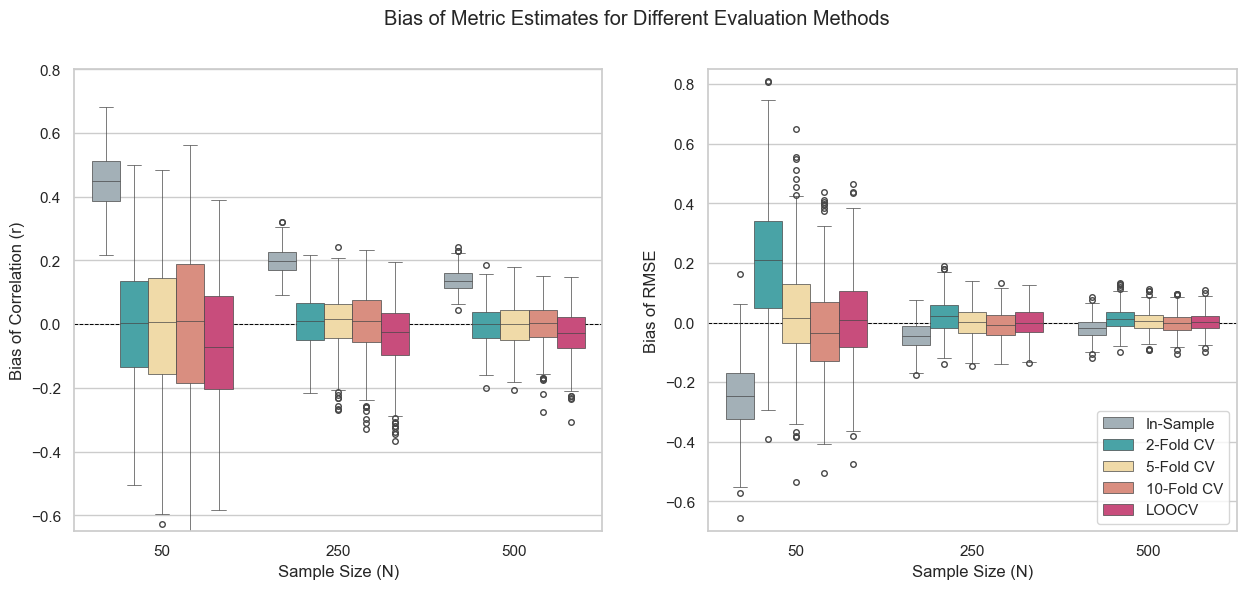

In [147]:
sns.set_theme(style="whitegrid")
palette = ["#A0B1BA", "#39B1B5", "#FCDE9C", "#E88471", "#DC3977"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
for i, m in enumerate(["r", "RMSE"]):
    axes[i].axhline(
        y=0,
        color="black",
        linestyle="--",
        linewidth=0.7,
    )
    sns.boxplot(
        x="n",
        y="bias",
        hue="estimator",
        data=data.query("dataset == 'simple' and metric == '%s'" % m),
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=axes[i],
    )
    axes[i].set_xlabel("Sample Size (N)")
    axes[i].set_ylabel(m)

# r
# axes[0][0].set_title("Correlation (r)")
axes[0].set_ylim(-0.65, 0.8)
axes[0].set_ylabel("Bias of Correlation (r)")
# RMSE
# axes[1][0].set_title("Root Mean Squared Error (RMSE)")
axes[1].set_ylim(-0.7, 0.85)
axes[1].set_ylabel("Bias of RMSE")

# legend
axes[0].get_legend().remove()
axes[1].legend(loc="lower right", ncol=1)

# show
fig.suptitle("Bias of Metric Estimates for Different Evaluation Methods")
fig.savefig("../out/study1a.png", dpi=300)

## Figure 2: Model Evaluation Reliability (Variance)

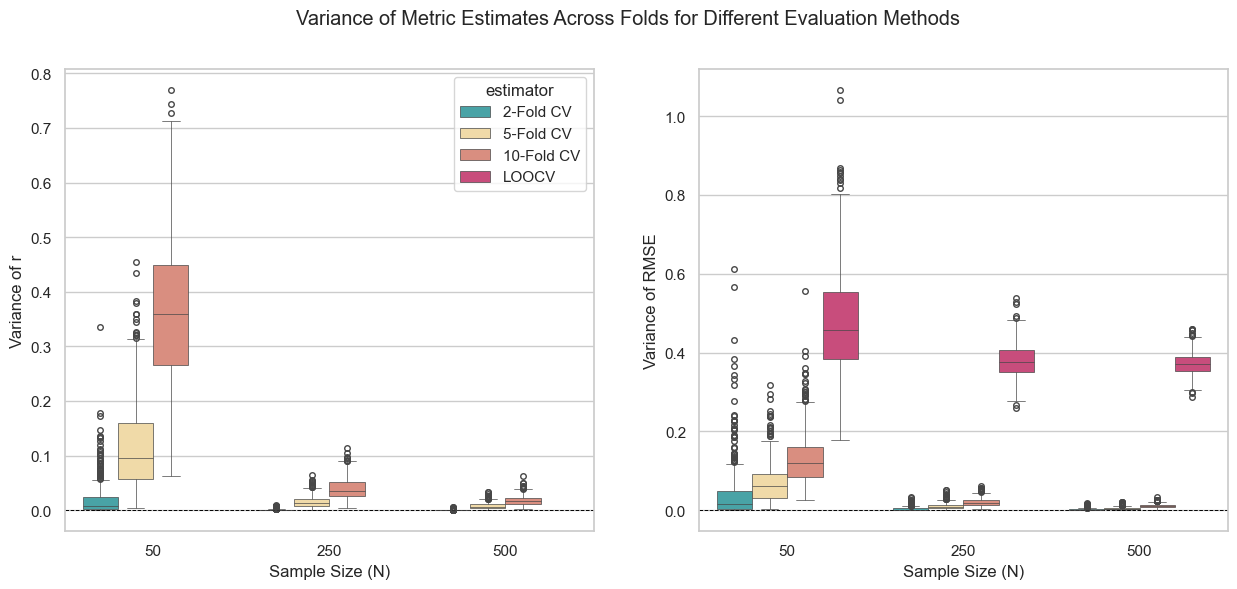

In [148]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#FCDE9C", "#E88471", "#DC3977"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, m in enumerate(["r", "RMSE"]):
    sns.boxplot(
        data=data.query(f"dataset == 'simple' and metric == '{m}' and estimator != 'In-Sample'"),
        x="n", y="variance",
        hue="estimator",
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=axes[i],
    )
    axes[i].axhline(
        y=0,
        color="black",
        linestyle="--",
        linewidth=0.7,
    )
    # axes[i].set_ylim(-0.05, 1.0)
    axes[i].set_xlabel("Sample Size (N)")

axes[1].get_legend().remove()
axes[0].set_ylabel("Variance of r")

axes[1].set_ylabel("Variance of RMSE")

fig.suptitle("Variance of Metric Estimates Across Folds for Different Evaluation Methods")
fig.savefig("../out/study1b.png", dpi=300)

In [42]:
data.query("metric == 'r'").groupby(["dataset", "metric", "estimator", "n"]).aggregate(["mean", "std"])

mean                bias            \
                                    mean       std      mean       std   
dataset  metric estimator  n                                             
simple   r      10-Fold CV 50   0.081201  0.248987  0.080751  0.250740   
                           250 -0.005372  0.090394 -0.004191  0.089423   
                           500 -0.008203  0.055852 -0.008853  0.055549   
                2-Fold CV  50   0.018365  0.212945  0.017916  0.213202   
                           250  0.022812  0.075181  0.023994  0.075222   
                           500 -0.000305  0.055889 -0.000955  0.055255   
                5-Fold CV  50   0.058626  0.245226  0.058176  0.248146   
                           250 -0.008269  0.088802 -0.007087  0.087140   
                           500  0.000578  0.060250 -0.000072  0.060573   
                In-Sample  50   0.858424  0.041887  0.857974  0.044872   
                           250  0.706962  0.028094  0.708143  0.028418   
                           500  0.634167  0.029373  0.633517  0.030616   
                LOOCV      50  -0.020323  0.210246 -0.020773  0.212642   
                           250 -0.021973  0.086384 -0.020791  0.085730   
                           500 -0.013340  0.062241 -0.013991  0.062177   
spectral r      10-Fold CV 50   0.306785  0.217970  0.055480  0.213983   
                           250  0.372437  0.071955  0.002176  0.067247   
                           500  0.400837  0.054309  0.000544  0.052247   
                2-Fold CV  50   0.234586  0.225424 -0.016719  0.235526   
                           250  0.344158  0.086772 -0.026103  0.081020   
                           500  0.378091  0.067225 -0.022202  0.065144   
                5-Fold CV  50   0.267001  0.214029  0.015696  0.213856   
                           250  0.363805  0.073160 -0.006456  0.069328   
                           500  0.396561  0.050222 -0.003732  0.049574   
                In-Sample  50   0.459844  0.102635  0.208539  0.111145   
                           250  0.432991  0.058826  0.062730  0.052929   
                           500  0.437369  0.045411  0.037076  0.042457   
                LOOCV      50   0.171749  0.226030 -0.079557  0.227901   
                           250  0.353988  0.074061 -0.016273  0.068196   
                           500  0.394700  0.049355 -0.005593  0.046263   

                                variance               i             
                                    mean       std  mean        std  
dataset  metric estimator  n                                         
simple   r      10-Fold CV 50   0.387418  0.124628  24.5  14.577380  
                           250  0.040469  0.015564  24.5  14.577380  
                           500  0.017345  0.008706  10.0   6.204837  
                2-Fold CV  50   0.009017  0.015558  24.5  14.577380  
                           250  0.001970  0.003217  24.5  14.577380  
                           500  0.000925  0.000707  10.0   6.204837  
                5-Fold CV  50   0.120694  0.081201  24.5  14.577380  
                           250  0.018948  0.010507  24.5  14.577380  
                           500  0.005592  0.002609  10.0   6.204837  
                In-Sample  50        NaN       NaN  24.5  14.577380  
                           250       NaN       NaN  24.5  14.577380  
                           500       NaN       NaN  10.0   6.204837  
                LOOCV      50        NaN       NaN  24.5  14.577380  
                           250       NaN       NaN  24.5  14.577380  
                           500       NaN       NaN  10.0   6.204837  
spectral r      10-Fold CV 50   0.347711  0.138340  24.5  14.577380  
                           250  0.038359  0.018304  24.5  14.577380  
                           500  0.018144  0.007970  10.0   6.204837  
                2-Fold CV  50   0.015516  0.028344  24.5  14.577380  
                           250  0.003674  0.005502  2

In [124]:
data.query("metric == 'R2'").groupby(["dataset", "metric", "estimator", "n"]).aggregate(["mean", "std"])

mean                bias            \
                                    mean       std      mean       std   
dataset  metric estimator  n                                             
simple   R2     10-Fold CV 50  -1.253363  0.829508 -0.939886  0.857498   
                           250 -0.104525  0.039500 -0.046241  0.052481   
                           500 -0.046907  0.016346 -0.013727  0.023957   
                2-Fold CV  50  -1.007563  0.591203 -0.694086  0.641580   
                           250 -0.102695  0.062715 -0.044410  0.070682   
                           500 -0.050053  0.029530 -0.016873  0.034202   
                5-Fold CV  50  -0.714045  0.348186 -0.400568  0.409378   
                           250 -0.082611  0.037864 -0.024326  0.049443   
                           500 -0.039887  0.018394 -0.006707  0.025593   
                In-Sample  50   0.201124  0.075387  0.514601  0.206672   
                           250  0.040999  0.017281  0.099284  0.037184   
                           500  0.020052  0.009041  0.053232  0.019520   
                LOOCV      50  -0.326240  0.136298 -0.012763  0.255529   
                           250 -0.049573  0.019097  0.008711  0.038829   
                           500 -0.024728  0.009525  0.008453  0.019947   
spectral R2     10-Fold CV 50  -1.053558  0.863700  0.235860  3.800251   
                           250  0.054101  0.067017  0.202784  0.489882   
                           500  0.105327  0.048846  0.128170  0.245472   
                2-Fold CV  50  -0.683618  0.500469  0.605800  3.779406   
                           250  0.062465  0.081537  0.211147  0.491511   
                           500  0.106265  0.056085  0.129109  0.246609   
                5-Fold CV  50  -0.501861  0.379364  0.787558  3.719503   
                           250  0.078147  0.068532  0.226829  0.488424   
                           500  0.115136  0.048320  0.137980  0.245213   
                In-Sample  50   0.323377  0.099984  1.612796  3.719373   
                           250  0.189283  0.053503  0.337965  0.488886   
                           500  0.168448  0.044427  0.191291  0.245660   
                LOOCV      50  -0.132557  0.174648  1.156861  3.722284   
                           250  0.111083  0.058690  0.259766  0.488496   
                           500  0.129778  0.046472  0.152622  0.245298   

                                variance                 i              
                                    mean        std   mean         std  
dataset  metric estimator  n                                            
simple   R2     10-Fold CV 50   7.163892  37.486459  249.5  144.481833  
                           250  0.017758   0.018961  249.5  144.481833  
                           500  0.003356   0.002283  249.5  144.481833  
                2-Fold CV  50   0.859479   2.875870  249.5  144.481833  
                           250  0.003195   0.005626  249.5  144.481833  
                           500  0.000511   0.000907  249.5  144.481833  
                5-Fold CV  50   0.743274   1.391427  249.5  144.481833  
                           250  0.007725   0.008767  249.5  144.481833  
                           500  0.001645   0.001567  249.5  144.481833  
                In-Sample  50        NaN        NaN  249.5  144.481833  
                           250       NaN        NaN  249.5  144.481833  
                           500       NaN        NaN  249.5  144.481833  
                LOOCV      50        NaN        NaN  249.5  144.481833  
                           250       NaN        NaN  249.5  144.481833  
                           500       NaN        NaN  249.5  144.481833  
spectral R2     10-Fold CV 50   7.999884  27.993854  249.5  144.481833  
                           250  0.037345   0.026897  249.5  144.481833  
                           500  0.012655   0.007623  249.5  144.481833  
                2-Fold CV  50   0.524906   1.085311  249.5  

In [122]:
data.query("metric == 'RMSE'").groupby(["dataset", "metric", "estimator", "n"]).aggregate(["mean", "std"])

mean                bias            \
                                    mean       std      mean       std   
dataset  metric estimator  n                                             
simple   RMSE   10-Fold CV 50   1.109727  0.141245 -0.024331  0.149060   
                           250  1.015009  0.045052 -0.005732  0.046084   
                           500  1.008078  0.032105 -0.000914  0.032826   
                2-Fold CV  50   1.348822  0.221918  0.214765  0.226201   
                           250  1.043078  0.055241  0.022337  0.056106   
                           500  1.022386  0.035288  0.013394  0.035873   
                5-Fold CV  50   1.169163  0.151209  0.035106  0.158105   
                           250  1.023044  0.046251  0.002303  0.047042   
                           500  1.012635  0.032405  0.003643  0.033165   
                In-Sample  50   0.889706  0.102873 -0.244351  0.115607   
                           250  0.976436  0.043113 -0.044304  0.044270   
                           500  0.989312  0.031337 -0.019680  0.032056   
                LOOCV      50   1.146175  0.135142  0.012118  0.143733   
                           250  1.021504  0.045100  0.000763  0.046159   
                           500  1.011663  0.032034  0.002671  0.032735   
spectral RMSE   10-Fold CV 50   1.855139  0.259526 -0.593538  1.133395   
                           250  1.737421  0.114181 -0.189667  0.359485   
                           500  1.720930  0.081774 -0.120711  0.231749   
                2-Fold CV  50   2.235736  0.379965 -0.212940  1.178733   
                           250  1.786851  0.123739 -0.140236  0.362860   
                           500  1.745640  0.085198 -0.096000  0.232943   
                5-Fold CV  50   1.950902  0.283644 -0.497774  1.130082   
                           250  1.751189  0.116858 -0.175898  0.359753   
                           500  1.727624  0.082163 -0.114017  0.231950   
                In-Sample  50   1.478586  0.194939 -0.970091  1.120511   
                           250  1.669311  0.110103 -0.257776  0.357105   
                           500  1.687395  0.079617 -0.154246  0.230537   
                LOOCV      50   1.912624  0.256353 -0.536053  1.131826   
                           250  1.747958  0.115174 -0.179129  0.359669   
                           500  1.726183  0.081410 -0.115458  0.231573   

                                variance                i              
                                    mean       std   mean         std  
dataset  metric estimator  n                                           
simple   RMSE   10-Fold CV 50   0.130498  0.066534  249.5  144.481833  
                           250  0.020865  0.009973  249.5  144.481833  
                           500  0.010496  0.004855  249.5  144.481833  
                2-Fold CV  50   0.040831  0.068216  249.5  144.481833  
                           250  0.003518  0.004829  249.5  144.481833  
                           500  0.001970  0.002650  249.5  144.481833  
                5-Fold CV  50   0.070135  0.050342  249.5  144.481833  
                           250  0.010374  0.007575  249.5  144.481833  
                           500  0.004816  0.003524  249.5  144.481833  
                In-Sample  50        NaN       NaN  249.5  144.481833  
                           250       NaN       NaN  249.5  144.481833  
                           500       NaN       NaN  249.5  144.481833  
                LOOCV      50   0.476648  0.131458  249.5  144.481833  
                           250  0.378830  0.041464  249.5  144.481833  
                           500  0.371255  0.028706  249.5  144.481833  
spectral RMSE   10-Fold CV 50   0.345243  0.181147  249.5  144.481833  
                           250  0.058564  0.027623  249.5  144.481833  
                           500  0.028615  0.014478  249.5  144.481833  
                2-Fold CV  50   0.104014  0.194714  249.5  144.481833  
         

In [123]:
data.query("metric == 'MAE'").groupby(["dataset", "metric", "estimator", "n"]).aggregate(["mean", "std"])

mean                bias            \
                                    mean       std      mean       std   
dataset  metric estimator  n                                             
simple   MAE    10-Fold CV 50   0.929418  0.121888  0.022232  0.126670   
                           250  0.817898  0.037752  0.001523  0.038382   
                           500  0.808669  0.027450  0.001682  0.028261   
                2-Fold CV  50   1.087558  0.186709  0.180373  0.189558   
                           250  0.833816  0.046203  0.017442  0.046797   
                           500  0.816817  0.029640  0.009829  0.030378   
                5-Fold CV  50   0.955948  0.128730  0.048763  0.133665   
                           250  0.820241  0.038798  0.003867  0.039277   
                           500  0.810061  0.027620  0.003074  0.028498   
                In-Sample  50   0.712378  0.087008 -0.194807  0.095637   
                           250  0.779644  0.035947 -0.036731  0.036718   
                           500  0.789937  0.026737 -0.017050  0.027583   
                LOOCV      50   0.917918  0.112907  0.010733  0.118549   
                           250  0.815635  0.037603 -0.000740  0.038299   
                           500  0.807766  0.027329  0.000778  0.028156   
spectral MAE    10-Fold CV 50   1.555345  0.223804 -0.398897  0.882307   
                           250  1.400247  0.095248 -0.147538  0.300109   
                           500  1.381267  0.067693 -0.095922  0.192953   
                2-Fold CV  50   1.801218  0.309305 -0.153025  0.918409   
                           250  1.429188  0.099980 -0.118597  0.300573   
                           500  1.395748  0.070018 -0.081441  0.193698   
                5-Fold CV  50   1.597463  0.240444 -0.356779  0.879461   
                           250  1.404756  0.096664 -0.143029  0.300332   
                           500  1.383378  0.067489 -0.093811  0.193049   
                In-Sample  50   1.189464  0.166307 -0.764778  0.869039   
                           250  1.334139  0.090770 -0.213646  0.297802   
                           500  1.349004  0.065543 -0.128185  0.191820   
                LOOCV      50   1.535616  0.216335 -0.418626  0.880001   
                           250  1.396381  0.094916 -0.151404  0.299774   
                           500  1.379715  0.067022 -0.097474  0.192697   

                                variance                i              
                                    mean       std   mean         std  
dataset  metric estimator  n                                           
simple   MAE    10-Fold CV 50   0.100197  0.052495  249.5  144.481833  
                           250  0.015222  0.007499  249.5  144.481833  
                           500  0.007594  0.003656  249.5  144.481833  
                2-Fold CV  50   0.029823  0.052787  249.5  144.481833  
                           250  0.002634  0.003493  249.5  144.481833  
                           500  0.001495  0.001924  249.5  144.481833  
                5-Fold CV  50   0.052054  0.038642  249.5  144.481833  
                           250  0.007778  0.005353  249.5  144.481833  
                           500  0.003524  0.002525  249.5  144.481833  
                In-Sample  50        NaN       NaN  249.5  144.481833  
                           250       NaN       NaN  249.5  144.481833  
                           500       NaN       NaN  249.5  144.481833  
                LOOCV      50   0.476648  0.131458  249.5  144.481833  
                           250  0.378830  0.041464  249.5  144.481833  
                           500  0.371255  0.028706  249.5  144.481833  
spectral MAE    10-Fold CV 50   0.265357  0.144327  249.5  144.481833  
                           250  0.043646  0.020623  249.5  144.481833  
                           500  0.021379  0.011227  249.5  144.481833  
                2-Fold CV  50   0.074074  0.130789  249.5  144.481833  
         